## Proyecto Complementario #1: Evaluando modelos ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import preprocessing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

## Data Cleaning

In [3]:
df = df.dropna()
df_filtro = df[(np.abs(stats.zscore(df['duration_ms'])) < 3)]
df1 = df_filtro.copy()

## Data Wrangling

In [4]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)
df1['loudness_db'] = - df1['loudness']
df1.drop('loudness', axis = 1, inplace = True)
df1[['artist_1', 'artist_2', 'artist_3']] = df1['artists'].str.split(';', 2, expand=True)
df1.drop('artists', axis = 1, inplace = True)

## Preprocesado

In [5]:
ord_enc = preprocessing.OrdinalEncoder()
df1['track_genre'] = ord_enc.fit_transform(df1[['track_genre']])
df1['track_genre']

X = df1.drop(['track_genre', 'track_id', 'album_name', 'track_name', 'explicit', 'mode', 'key', 'time_signature', 'artist_1', 'artist_2', 'artist_3'], axis = 1) 

y = df1['track_genre']

X2 = X.iloc[::15,:] 
y2 = y.iloc[::15]

## Selección de modelos de ML

A continuación se probarán distintos modelos de clasificación y se evaluarán las métricas obtenidas. Los algoritmos empleados son KNeighbors, Gaussian Naive Bayes, Decision tree y Randon Forest. Se probaron otros algoritmos tales como SVC, Quadratic Discriminant, Ada Boost, etcétera, pero no funcionaron adecuadamente o no eran extremadamente lentos.

Para cada algoritmo se empleó el Forward Feature Selector para determinar las 3, 5, 7, 9 y 10 variables que el algoritmo considera más relevantes (Sprint 3, Sprint 5, Sprint 7, Sprint 9 y Sprint 10, respectivamente). Y luego para cada Sprint se aplicó el algoritmo y se calculan las métricas.

Cómo métrica de bondad de ajuste se encuentra Mean Absolute Error (MAE) la cual será utilizada para dilucidar posibles casos de under o overfitting.

### KNeighbors Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

forw = {}

for i in [3, 5, 7, 9, 10]:
    forw[f'sfs_{i}'] = SequentialFeatureSelector(knn, n_features_to_select = i)
    forw[f'sfs_{i}'].fit(X2, y2)
    # print(f'Las {i} variables seleccionadas son:', list(X2.columns[forw[f'sfs_{i}'].get_support()]))
    forw[f'sfs_{i}_var'] = X2.columns[forw[f'sfs_{i}'].get_support()]

In [8]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

accuracy_forw, recall_forw, f1_forw = [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw[f'sfs_{i}'].get_support()])]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    
    accuracy_forw.append(accuracy_score(y_test, y_test_pred))
    recall_forw.append(recall_score(y_test, y_test_pred, average = 'macro'))
    f1_forw.append(f1_score(y_test, y_test_pred, average = 'macro'))
    
comparacion_forw = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw, 'Recall': recall_forw, 'F1': f1_forw})

comparacion_forw.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.13,0.13,0.13
1,Sprint 5,0.16,0.16,0.16
2,Sprint 7,0.19,0.19,0.19
3,Sprint 9,0.20,0.20,0.20
4,Sprint 10,0.18,0.18,0.18


### Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
nb = GaussianNB()

forw_nb = {}

for i in [3, 5, 7, 9, 10]:
    forw_nb[f'sfs_{i}'] = SequentialFeatureSelector(nb, n_features_to_select = i)
    forw_nb[f'sfs_{i}'].fit(X2, y2)
    # print(f'Las {i} variables seleccionadas son:', list(X2.columns[forw_nb[f'sfs_{i}'].get_support()]))
    forw_nb[f'sfs_{i}_var'] = X2.columns[forw_nb[f'sfs_{i}'].get_support()]

In [11]:
nb = GaussianNB()

accuracy_forw_nb, recall_forw_nb, f1_forw_nb = [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw_nb[f'sfs_{i}'].get_support()])]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    nb.fit(X_train, y_train)
    
    y_test_pred = nb.predict(X_test)
    
    accuracy_forw_nb.append(accuracy_score(y_test, y_test_pred))
    recall_forw_nb.append(recall_score(y_test, y_test_pred, average = 'macro'))
    f1_forw_nb.append(f1_score(y_test, y_test_pred, average = 'macro'))
    
comparacion_forw_nb = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw_nb, 'Recall': recall_forw_nb, 'F1': f1_forw_nb})

comparacion_forw_nb.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.11,0.11,0.07
1,Sprint 5,0.15,0.15,0.11
2,Sprint 7,0.17,0.17,0.13
3,Sprint 9,0.18,0.19,0.14
4,Sprint 10,0.18,0.18,0.14


### Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier(min_samples_split = 10)

forw_dtc = {}

for i in [3, 5, 7, 9, 10]:
    forw_dtc[f'sfs_{i}'] = SequentialFeatureSelector(dtc, n_features_to_select = i)
    forw_dtc[f'sfs_{i}'].fit(X2, y2)
    # print(f'Las {i} variables seleccionadas son:', list(X2.columns[forw_dtc[f'sfs_{i}'].get_support()]))
    forw_dtc[f'sfs_{i}_var'] = X2.columns[forw_dtc[f'sfs_{i}'].get_support()]

In [14]:
dtc = DecisionTreeClassifier(min_samples_split = 10)

accuracy_forw_dtc, recall_forw_dtc, f1_forw_dtc = [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw_dtc[f'sfs_{i}'].get_support()])]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    dtc.fit(X_train, y_train)
    
    y_test_pred = dtc.predict(X_test)

    accuracy_forw_dtc.append(accuracy_score(y_test, y_test_pred))
    recall_forw_dtc.append(recall_score(y_test, y_test_pred, average = 'macro'))
    f1_forw_dtc.append(f1_score(y_test, y_test_pred, average = 'macro'))
    
comparacion_forw_dtc = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw_dtc, 'Recall': recall_forw_dtc, 'F1': f1_forw_dtc})

comparacion_forw_dtc.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.13,0.14,0.13
1,Sprint 5,0.17,0.18,0.17
2,Sprint 7,0.20,0.20,0.20
3,Sprint 9,0.22,0.22,0.22
4,Sprint 10,0.22,0.22,0.22


### Random Forrest 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)

forw_rfc = {}

for i in [3, 5, 7, 9, 10]:
    forw_rfc[f'sfs_{i}'] = SequentialFeatureSelector(rfc, n_features_to_select = i)
    forw_rfc[f'sfs_{i}'].fit(X2, y2)
    # print(f'Las {i} variables seleccionadas son:', list(X2.columns[forw_rfc[f'sfs_{i}'].get_support()]))
    forw_rfc[f'sfs_{i}_var'] = X2.columns[forw_rfc[f'sfs_{i}'].get_support()]

In [17]:
rfc = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)

accuracy_forw_rfc, recall_forw_rfc, f1_forw_rfc = [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw_rfc[f'sfs_{i}'].get_support()])]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    rfc.fit(X_train, y_train)
    
    y_test_pred = rfc.predict(X_test)
    
    accuracy_forw_rfc.append(accuracy_score(y_test, y_test_pred))
    recall_forw_rfc.append(recall_score(y_test, y_test_pred, average = 'macro'))
    f1_forw_rfc.append(f1_score(y_test, y_test_pred, average = 'macro'))
    
comparacion_forw_rfc = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw_rfc, 'Recall': recall_forw_rfc, 'F1': f1_forw_rfc})

comparacion_forw_rfc.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.13,0.13,0.08
1,Sprint 5,0.15,0.15,0.10
2,Sprint 7,0.16,0.16,0.11
3,Sprint 9,0.15,0.15,0.10
4,Sprint 10,0.16,0.16,0.10


### Ada Boost Classifier

Este algoritmo resulta extremandamente lento a la hora de realizar el Forward Feature Selector, es por ello que se tomaron los features determinados por Random Forest.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
abc = AdaBoostClassifier()

accuracy_forw_abc, recall_forw_abc, f1_forw_abc = [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw_rfc[f'sfs_{i}'].get_support()])]
    
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    abc.fit(X_train, y_train)
    
    y_test_pred = abc.predict(X_test)
    
    accuracy_forw_abc.append(accuracy_score(y_test, y_test_pred))
    recall_forw_abc.append(recall_score(y_test, y_test_pred, average = 'macro'))
    f1_forw_abc.append(f1_score(y_test, y_test_pred, average = 'macro'))
    
comparacion_forw_abc = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw_abc, 'Recall': recall_forw_abc, 'F1': f1_forw_abc})

comparacion_forw_abc.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.07,0.06,0.03
1,Sprint 5,0.11,0.11,0.08
2,Sprint 7,0.09,0.09,0.04
3,Sprint 9,0.09,0.09,0.04
4,Sprint 10,0.12,0.12,0.08


## Evaluando underfitting y overfitting

En esta sección se utilizará la métrica "accuracy" para evaluar cuando un algoritmo de ML se encuentra en under/over-fitting. En particular, el método utilizado es el Decision Tree Classifier, calcularemos la métrica accuracy, para evaluar la perfomance en el train dataset y en el test dataset mientras variamos la complejidad del algoritmo.

In [63]:
train_metric, test_metric = [], []

X_9 = X[list(X2.columns[forw_dtc['sfs_9'].get_support()])]
X_train, X_test, y_train, y_test = train_test_split(X_9, y, random_state = 42, stratify = y)

k = np.arange(2, 20, 2)

for i in k:
    # dtc = DecisionTreeClassifier(min_samples_split = i)
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)

    # Evaluamos en el train dataset
    y_train_pred = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_metric.append(train_acc)

    # Evaluamos en el test dataset
    y_test_pred = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_metric.append(test_acc)

In [64]:
max(test_metric).round(3)

0.239

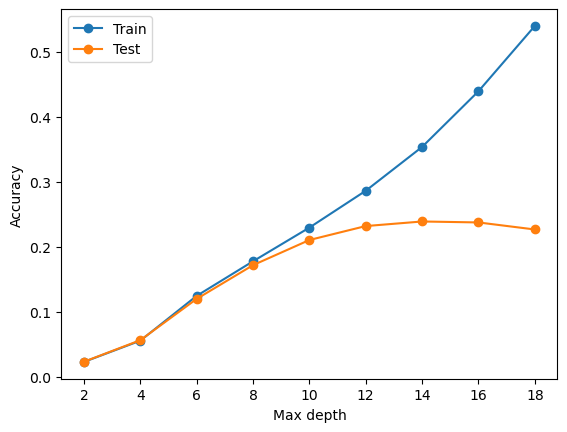

In [65]:
plt.plot(k, train_metric, '-o', label = 'Train')
plt.plot(k, test_metric, '-o', label = 'Test')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [77]:
train_metric_2, test_metric_2 = [], []

k = np.arange(2, 80, 10)

for i in k:
    dtc = DecisionTreeClassifier(min_samples_split = i, max_depth = 14)
    dtc.fit(X_train, y_train)

    # Evaluamos en el train dataset
    y_train_pred = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_metric_2.append(train_acc)

    # Evaluamos en el test dataset
    y_test_pred = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_metric_2.append(test_acc)

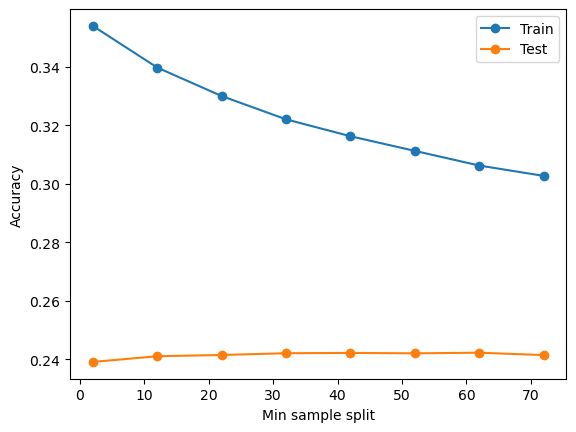

In [82]:
plt.plot(k, train_metric_2, '-o', label = 'Train')
plt.plot(k, test_metric_2, '-o', label = 'Test')
plt.xlabel('Min sample split')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()